In [1]:
#https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/
import imutils
import cv2
import numpy as np
import os
from os import listdir
from os.path import isfile,join
from shutil import copyfile
from pathlib import Path
from scipy import ndimage
from tqdm import tqdm_notebook as tqdm


from data_aug.data_aug import *
from data_aug.bbox_util import *
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl
%matplotlib inline

#Create automatically the final directory
final_directory=Path("augmentation").mkdir(parents=True, exist_ok=True)
image_dir = "./test_images"
namelist=[]

#All image files in a list called namelist
for file in os.listdir(image_dir):
  if file.endswith((".jpg", ".png")):
    namelist.append(file)

In [2]:
namelist

['00addb1dbdd33b24.jpg',
 '00b1ec3fbe90c7ba.jpg',
 '00d86c0c20525f24.jpg',
 '0a3b35f6e4209a94.jpg',
 '0a57703197ee4d44.jpg',
 '0a5afe7bdf18de85.jpg',
 '0a6a9f701ee34f4f.jpg',
 '0a7cd3d655c0329c.jpg',
 '0afab325c3e4bc7e.jpg',
 '0b2e4d9e58565e38.jpg',
 '0b65ff98d29f6d77.jpg',
 '0b8d6c8458eb9cab.jpg',
 '0bd58a7b86d2c0be.jpg',
 '0bf5f574d88e9762.jpg',
 '0c1211e25f956883.jpg',
 '0c3955489d2ed201.jpg',
 '0cdd83dd219791e0.jpg',
 '0d145e448fff29ff.jpg',
 '0d3a6ab35c03ee57.jpg',
 '0daf68a48125ab7d.jpg',
 '0dd3a2ad1be3b5a0.jpg',
 '0df6683c5ef75b15.jpg',
 '0e15dd0c923c4626.jpg',
 '0e20ad9ac9e0a7fc.jpg',
 '0e41dc6b9e19444e.jpg']

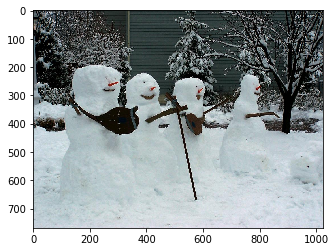

In [3]:
imagepath=namelist[12]
img=cv2.imread('test_images/'+imagepath)[:,:,::-1] 
plt.imshow(img)
plt.show()

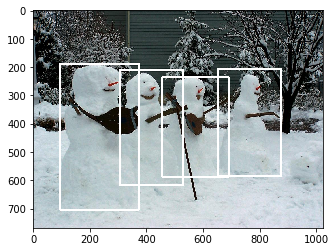

In [4]:
imagepath=imagepath.split(".")
name = imagepath[0] #remove .jpg or .png from the name
h,w,ch = img.shape
bboxes=[]
f= open("test_images/"+name+".txt","r+")
lines = f.readlines()
for line in lines:
    line=line.strip('\n') #On retire le \n à la fin
    line=line.split(' ')  #On découpe la ligne à chaque espace
    center_x = float(line[1])*w
    center_y = float(line[2])*h
    width = float(line[3])*w
    height = float(line[4])*h
    left = int(center_x - width /2)
    top =  int (center_y - height/2)
    right = left+width
    bottom = top+height
    classe = float(line[0])
    bboxes.append([left, top, right, bottom, classe])
bboxes=np.array(bboxes)
plotted_img = draw_rect(img, bboxes)
plt.imshow(plotted_img)
plt.show()

In [ ]:
import random
#rotation
for angle in tqdm(np.arange(-10,10+1,1)):
    #scale
    for scale in tqdm(np.round(np.arange(-0.5,0.5+0.1,0.1),1)): 
        #shear
        for shear in tqdm(np.round(np.arange(-0.1,0.1+0.1,0.01),2)):
        #translation
            for translation_x in tqdm(np.round(np.arange(0.01,0.2+0.01,0.01),2)):
                for translation_y in tqdm(np.round(np.arange(0.01,0.2+0.01,0.01),2)):
                    flipped = random.uniform(0,1) < 0.5
                    if flipped:
                        seq = Sequence([Rotate(angle),Shear(shear), Translate(translation_x,translation_y), HorizontalFlip()])
                    else:
                        seq = Sequence([Rotate(angle),Shear(shear), Translate(translation_x,translation_y)])
                    img_, bboxes_ = seq(img.copy(), bboxes.copy())
                    cv2.imwrite("augmentation/%s_%d_x%.2f_%.2f+(%.2f,%.2f)%d.jpg" % (name,angle,scale,shear,translation_x,translation_y, int(flipped)), img_)
                    file = open("augmentation/%s_%d_x%.2f_%.2f+(%.2f,%.2f)%d.txt" % (name,angle,scale,shear,translation_x,translation_y, int(flipped)), "w")
                    file.write(str(bboxes_))
                    file.close()

In [11]:
##TEST

#import random
#angle = -8
#scale = -0.4
#translation_x = 0.10
#translation_y = 0.14
#shear = -0.08
#flipped = random.uniform(0,1) < 0.5
#if flipped:
#    seq = Sequence([Rotate(angle),Shear(shear), Translate(translation_x,translation_y), HorizontalFlip()])
#else:
#    seq = Sequence([Rotate(angle),Shear(shear), Translate(translation_x,translation_y)])
#img_, bboxes_ = seq(img.copy(), bboxes.copy())
#cv2.imwrite("augmentation/%s_%d_x%.2f_%.2f+(%.2f,%.2f)%d.jpg" % (name,angle,scale,shear,translation_x,translation_y, int(flipped)), img_)
#file = open("augmentation/%s_%d_x%.2f_%.2f+(%.2f,%.2f)%d.txt" % (name,angle,scale,shear,translation_x,translation_y, int(flipped)), "w")
#file.write(str(bboxes_))
#file.close()

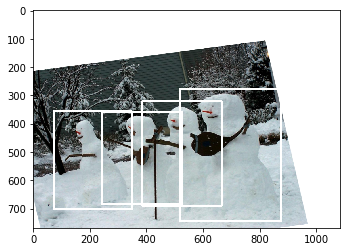

In [86]:
#TEST2
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()